#### <font color=green>Tri Yohana Ravika Munthe</font><br><font color=green>23102010055</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r'Data_Mobil_Indonesia.csv')
df

,ID_Pelanggan,Level_Risiko,Merek_Mobil,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,...,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Unnamed: 26
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,NaN
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,NaN
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,NaN
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,NaN
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,NaN
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,NaN
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,NaN
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,NaN


In [12]:
df.shape

(205, 27)

In [14]:
df.groupby('Lokasi_Mesin').mean()

,ID_Pelanggan,Level_Risiko,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Ukuran_Mesin,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Unnamed: 26
Lokasi_Mesin,,,,,,,,,,,,,,,,,
front,102.628713,0.80198,98.894059,174.125743,65.921287,53.756436,2552.371287,125.910891,3.323663,3.260693,10.152079,102.589109,5113.613861,25.341584,30.836634,12961.097361,NaN
rear,128.000000,3.00000,89.500000,168.900000,65.000000,51.600000,2770.666667,194.000000,3.740000,2.900000,9.500000,207.000000,5900.000000,17.000000,25.000000,34528.000000,NaN


## Data Cleaning

In [5]:
df.drop(['Unnamed: 26'], axis=1, inplace=True)

In [6]:
df.describe()

,ID_Pelanggan,Level_Risiko,Sumbu_Roda,Panjang,Lebar,Tinggi,Berat,Ukuran_Mesin,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


mengganti merek mobil menjadi perusahaan yang memproduksi mobil tersebut.

In [7]:
Nama_Perusahaan = df['Merek_Mobil'].apply(lambda x : x.split(' ')[0])
df.insert(3,"Nama_Perusahaan",Nama_Perusahaan)
df.drop(['Merek_Mobil'],axis=1,inplace=True)
df

,ID_Pelanggan,Level_Risiko,Nama_Perusahaan,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,...,Ukuran_Mesin,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df["Nama_Perusahaan"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Ada beberapa error dalam penulisan nama perusaahan diatas seperti maxda, Nissan, porcsche, toyouta, dan vokwagen atau vw.

In [9]:
df.Nama_Perusahaan = df.Nama_Perusahaan.str.lower()

def replace_name(a,b):
    df.Nama_Perusahaan.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.Nama_Perusahaan.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
df.columns

Index(['ID_Pelanggan', 'Level_Risiko', 'Nama_Perusahaan', 'BBM', 'Tipe_Mobil',
       'Pintu_Mobil', 'Badan_Mobil', 'Roda_Penggerak', 'Lokasi_Mesin',
       'Sumbu_Roda', 'Panjang', 'Lebar', 'Tinggi', 'Berat', 'Mesin',
       'Silinder', 'Ukuran_Mesin', 'Sistem_BBM', 'Rasio_Bore', 'Stroke',
       'Kompresi', 'Daya_Kuda', 'RPM', 'JT_Kota', 'JT_JalanRaya',
       'Harga_Mobil'],
      dtype='object')

## Visualizing Data

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


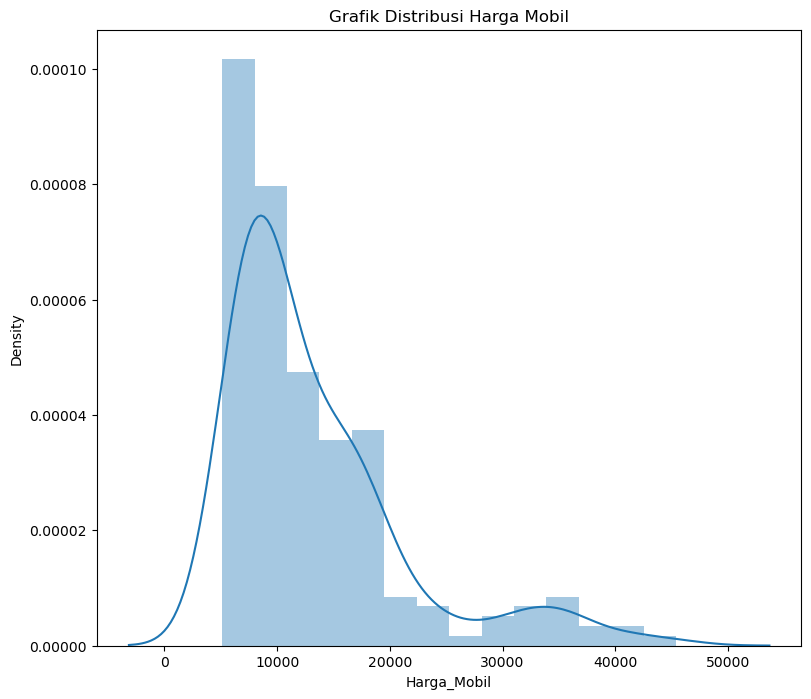

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Grafik Distribusi Harga Mobil')
sns.distplot(df.Harga_Mobil)

plt.show()

Dari grafik diatas dapat dilihat bahwa data memiliki kecondongan ke kanan (skewed to right). Hal ini berarti sebagian besar harga mobil pada dataset berada di bagian dengan harga yang rendah yaitu di bawah 20000. 

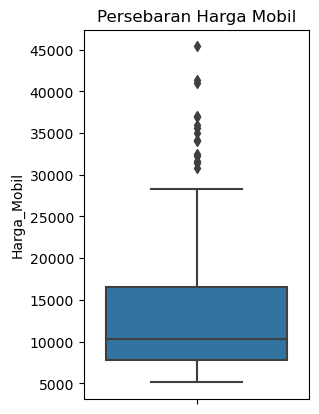

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: Harga_Mobil, dtype: float64


In [12]:
plt.subplot(1,2,2)
plt.title('Persebaran Harga Mobil')
sns.boxplot(y=df.Harga_Mobil)

plt.show()

print(df.Harga_Mobil.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

1.Titik data tersebar jauh dari mean, yang menandakan varian harga mobil yang tinggi. 90% harga mobil di bawah 22,563 sedangkan sisanya 10% berada diantara 22,563 dan 45,400. <br>2.Ada perbedaan yang signifikan sekitar 2,981 antara mean dan median pada distribusi harga mobil.

### Visualizing Categorical Data

### <font color=army>1. Level Risiko</font>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


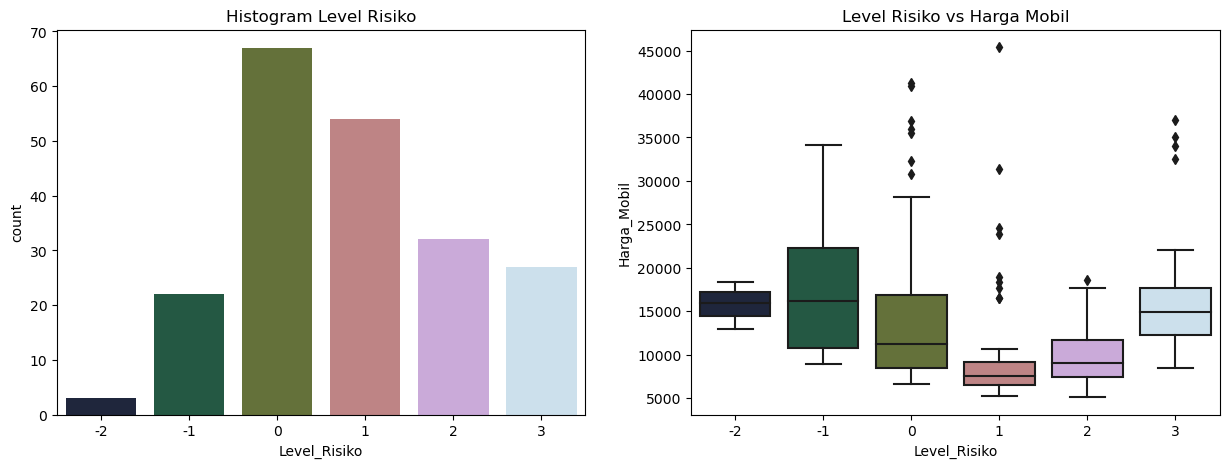

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histogram Level Risiko')
sns.countplot(df.Level_Risiko, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Level Risiko vs Harga Mobil')
sns.boxplot(x=df.Level_Risiko, y=df.Harga_Mobil, palette=("cubehelix"))

plt.show()

Mobil yang paling banyak terjual adalah mobil dengan risiko 0 dan 1. Sedangkan mobil yang paling sedikit terjual adalah mobil dengan resiko -2. Mobil dengan risiko 1 memliki harga yang paling rendah. Range harga mobil dengan risiko -1 lebih tinggi dibanding yang lain kemungkinan karena insurance rating -1 lumayan bagus.

### <font color=army>2. Bahan Bakar Minyak</font>

[Text(0.5, 0, 'Jenis BBM'), Text(0, 0.5, 'Frekuensi dari jenis BBM')]

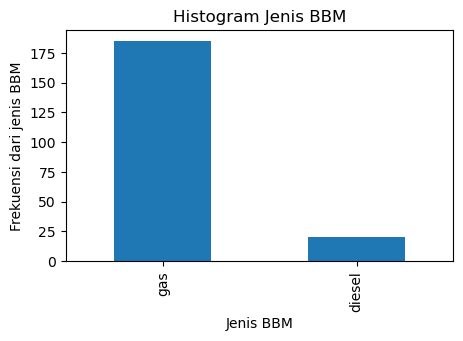

In [14]:
plt.figure(figsize=(5, 3))
plt1 = df["BBM"].value_counts().plot(kind='bar')
plt.title('Histogram Jenis BBM')
plt1.set(xlabel = 'Jenis BBM', ylabel='Frekuensi dari jenis BBM')

Lebih banyak mobil dengan bahan bakar gas yang dibeli dibanding dengan mobil dengan bahan bakar diesel. 

### <font color=army>3. Tipe Mobil</font>

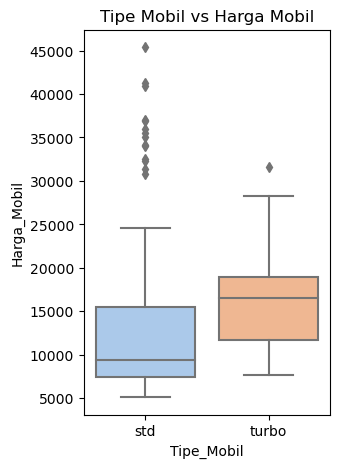

In [15]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,2)
plt.title('Tipe Mobil vs Harga Mobil')
sns.boxplot(x=df.Tipe_Mobil, y=df.Harga_Mobil, palette=("pastel"))

plt.show()

Dapat dilihat bahwa price range dari mobil turbo lebih tinggi dari mobil std.

### <font color=army>4. Pintu Mobil</font>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


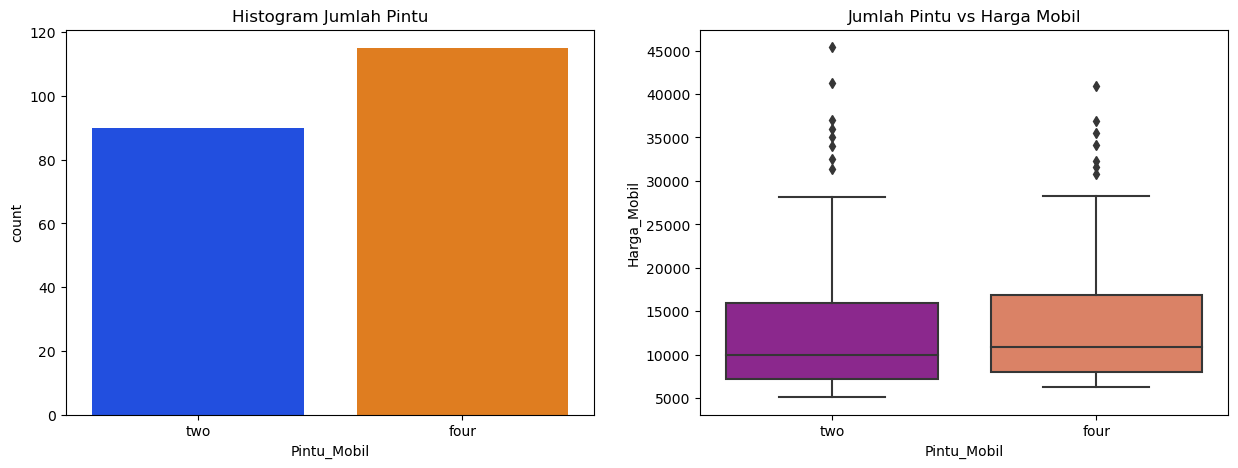

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histogram Jumlah Pintu')
sns.countplot(df.Pintu_Mobil, palette=("bright"))

plt.subplot(1,2,2)
plt.title('Jumlah Pintu vs Harga Mobil')
sns.boxplot(x=df.Pintu_Mobil, y=df.Harga_Mobil, palette=("plasma"))

plt.show()

Jumlah mobil 4 pintu yang terjual tidak memiliki perbedaan yang signifikan dengan jumlah mobil 2 pintu yang terjual. Dapat dilihat juga bahwa jumlah pintu pada mobil tidak mempengaruhi harga mobil.

### <font color=army>5. Badan Mobil</font>

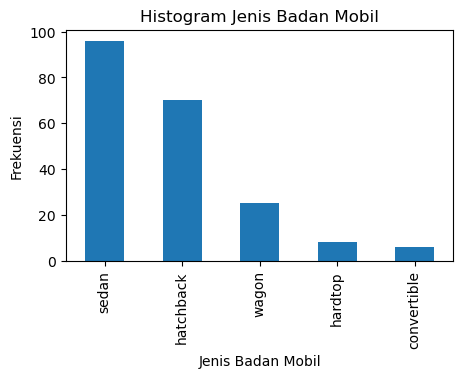

In [17]:
plt.figure(figsize=(5, 3))
plt1 = df.Badan_Mobil.value_counts().plot(kind='bar')
plt.title('Histogram Jenis Badan Mobil')
plt1.set(xlabel = 'Jenis Badan Mobil', ylabel='Frekuensi')

plt.show()

Sedan merupakan jenis mobil yang lebih banyak dibeli.

In [18]:
def plot_count(x,fig):
    plt.figure(figsize=(15, 35))
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("plasma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Harga Mobil')
    sns.boxplot(x=df[x], y=df.Harga_Mobil, palette=("plasma"))

### <font color=army>6. Roda Penggerak</font>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


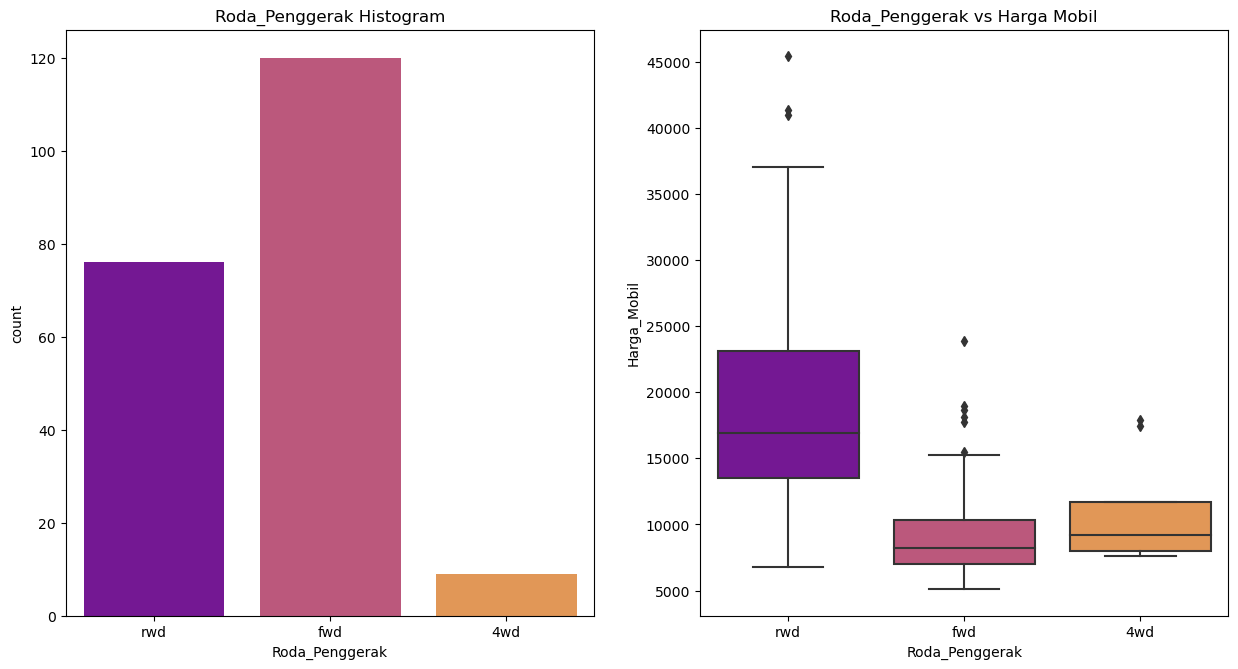

In [19]:
plot_count('Roda_Penggerak', 7)

Terdapat perbedaan jumlah pembelian yang significant antara mobil dengan penggerak yang berbeda. Mobil dengan penggerak 4wd terjual jauh lebih sedikit dibanding dengan fwd dan rwd. Pada grafik kedua dapat dilihat bahwa mobil dengan roda penggerak rwd memiliki range harga yang jauh lebih tinggi dibanding dengan dua lainnya.

### <font color=army>7. Lokasi Mesin</font>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


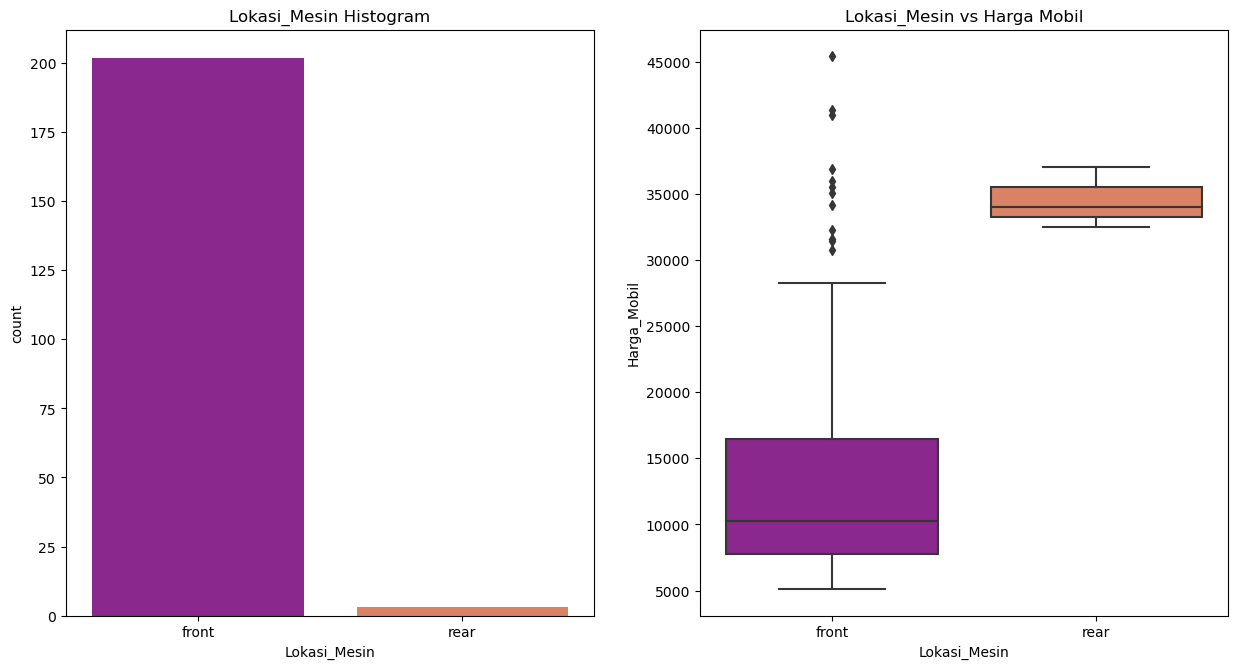

In [20]:
plot_count('Lokasi_Mesin', 1)

Sangat sedikit orang yang membeli mobil dengan lokasi mesin yang berada di belakang. Range harga mobil ini juga jauh lebih tinggi dibanding dengan harga mobil dengan mesin di depan.

### <font color=army>8. Jenis Mesin</font>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


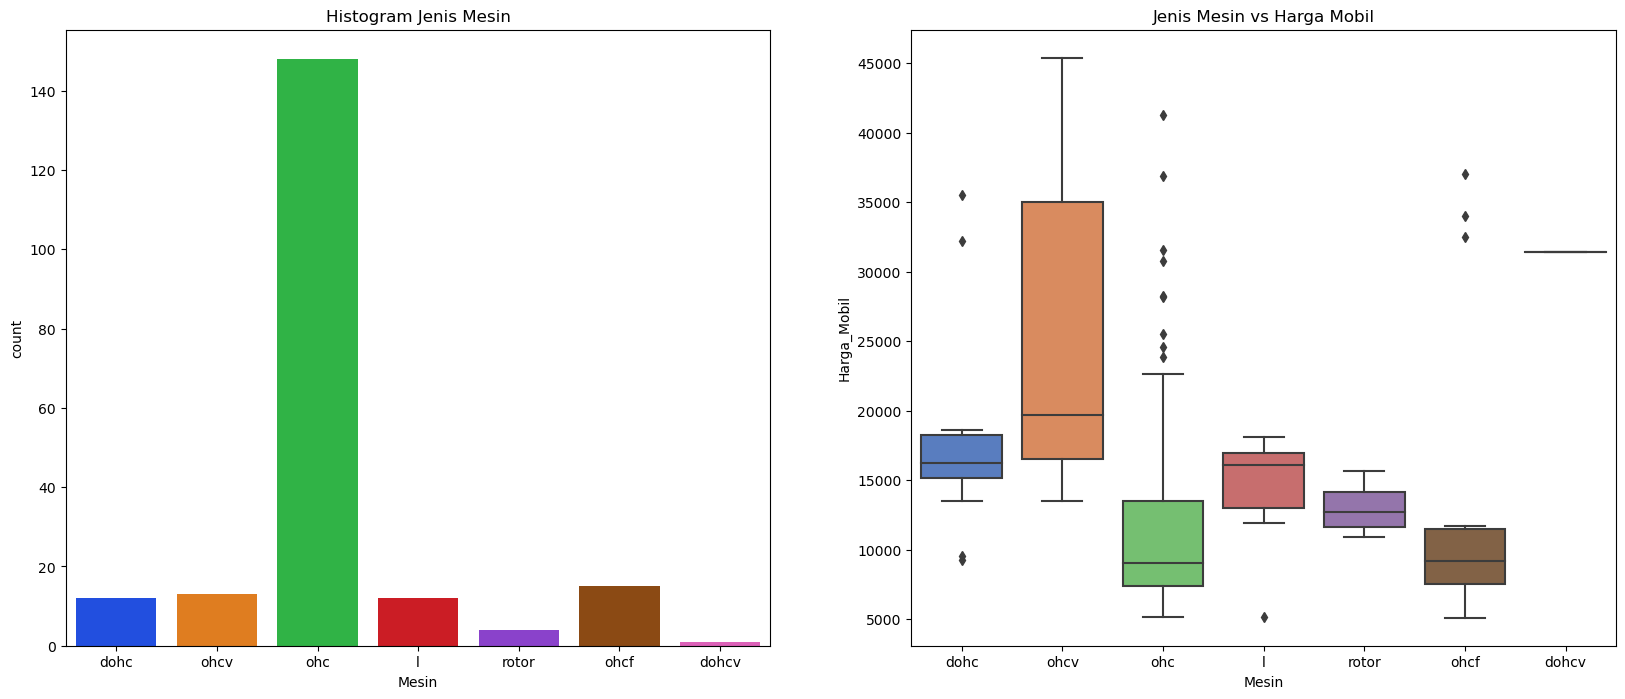

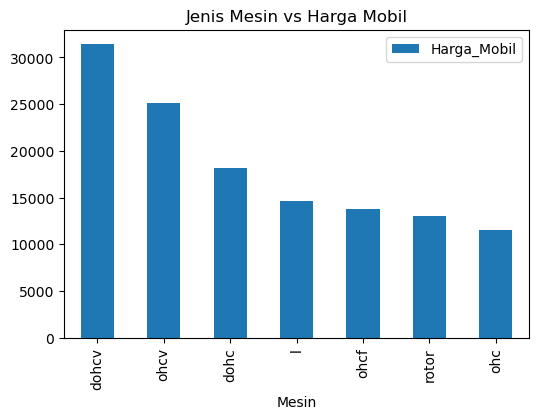

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram Jenis Mesin')
sns.countplot(df.Mesin, palette=("bright"))

plt.subplot(1,2,2)
plt.title('Jenis Mesin vs Harga Mobil')
sns.boxplot(x=df.Mesin, y=df.Harga_Mobil, palette=("muted"))

plt.show()

df1 = pd.DataFrame(df.groupby(['Mesin'])['Harga_Mobil'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(6,4))
plt.title('Jenis Mesin vs Harga Mobil')
plt.show()


Mobil dengan jenis mesin ohc terjual dalam jumlah yang jauh lebih banyak dibanding dengan mobil dengan jenis mesin lain. Hal ini mungkin terjadi karena harga mobil yang menggunakan mesin tersebut memiliki harga yang lebih murah dibanding mobil lain. Pada grafik kedua dapat dilihat bahwa terdapat perbedaan range harga signifikan antara mobil mesin ohcv dengan mobil mesin lain. 

### <font color=army>9. Silinder</font>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


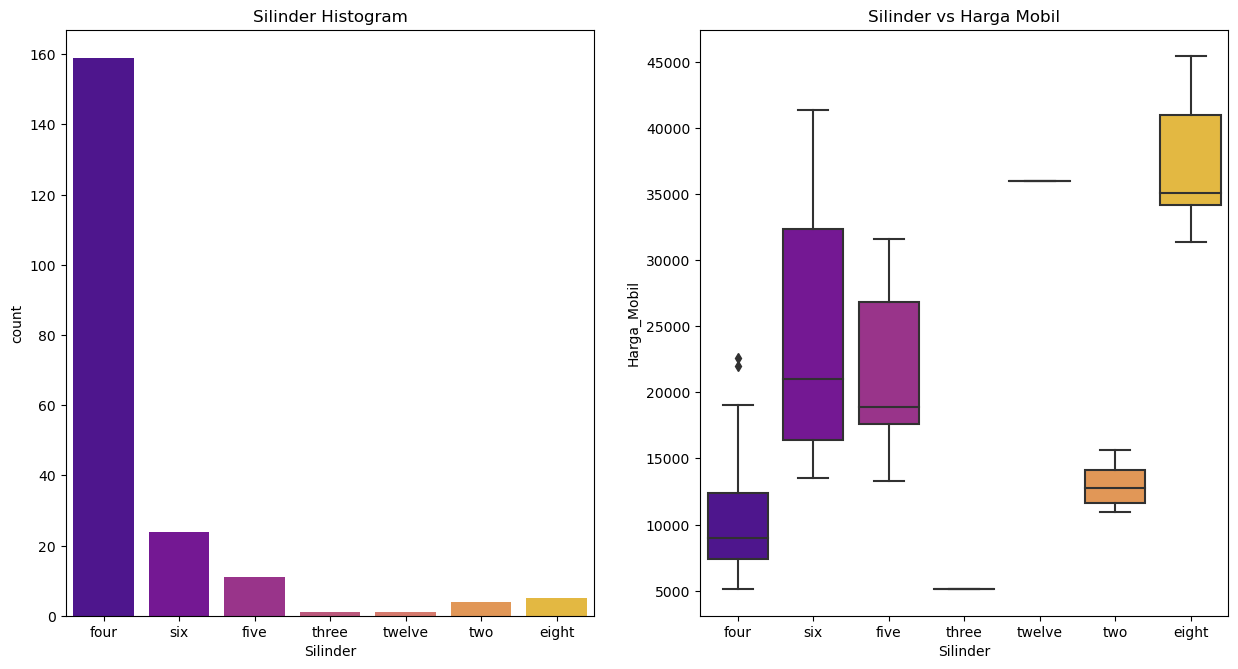

In [22]:
plot_count('Silinder', 3)

Silinder four terjual jauh lebih banyak daripada silinder lain kemugkinan karna harga mobil dengan silinder ini lebih murah. Sedangkan silinder dengan range termahal adalah silinder eight

### <font color=army>10. Perusahaan</font>

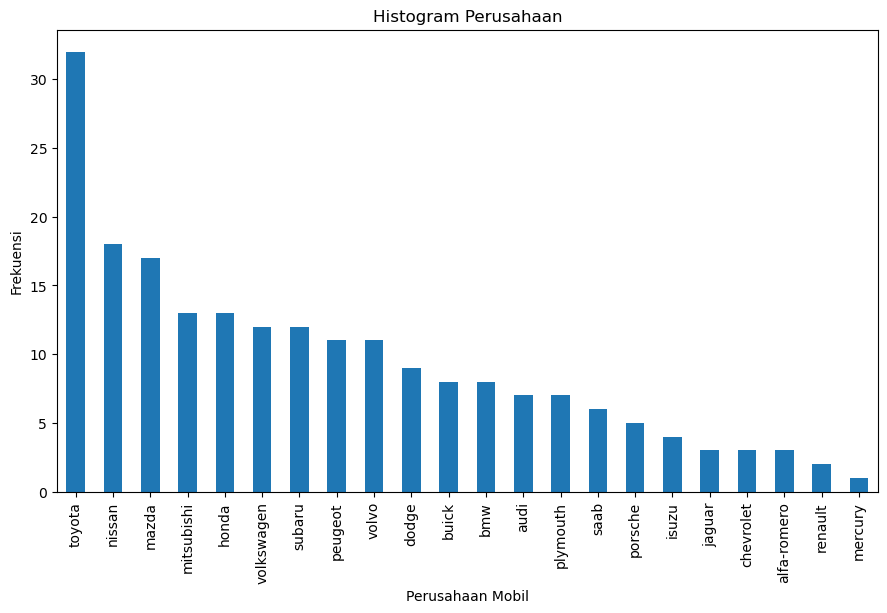

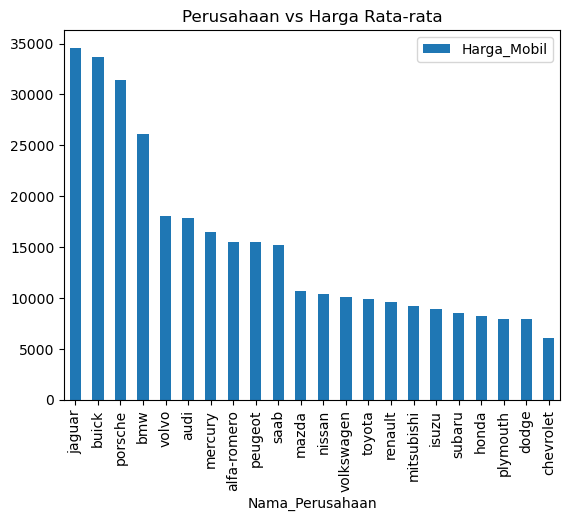

In [23]:
plt.figure(figsize=(36, 6))

plt.subplot(1,3,1)
plt1 = df.Nama_Perusahaan.value_counts().plot(kind='bar')
plt.title('Histogram Perusahaan')
plt1.set(xlabel = 'Perusahaan Mobil', ylabel='Frekuensi')

df2 = pd.DataFrame(df.groupby(['Nama_Perusahaan'])['Harga_Mobil'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Perusahaan vs Harga Rata-rata')
plt.show()

Toyota terjual lebih banyak mobil dibanding perusahaan lain. Jaguar, Buick, dan Porsche memiliki harga rata-rata yang lebih tinggi dari yang lain yaitu di atas 30,000.

### Visualizing Numerical Data

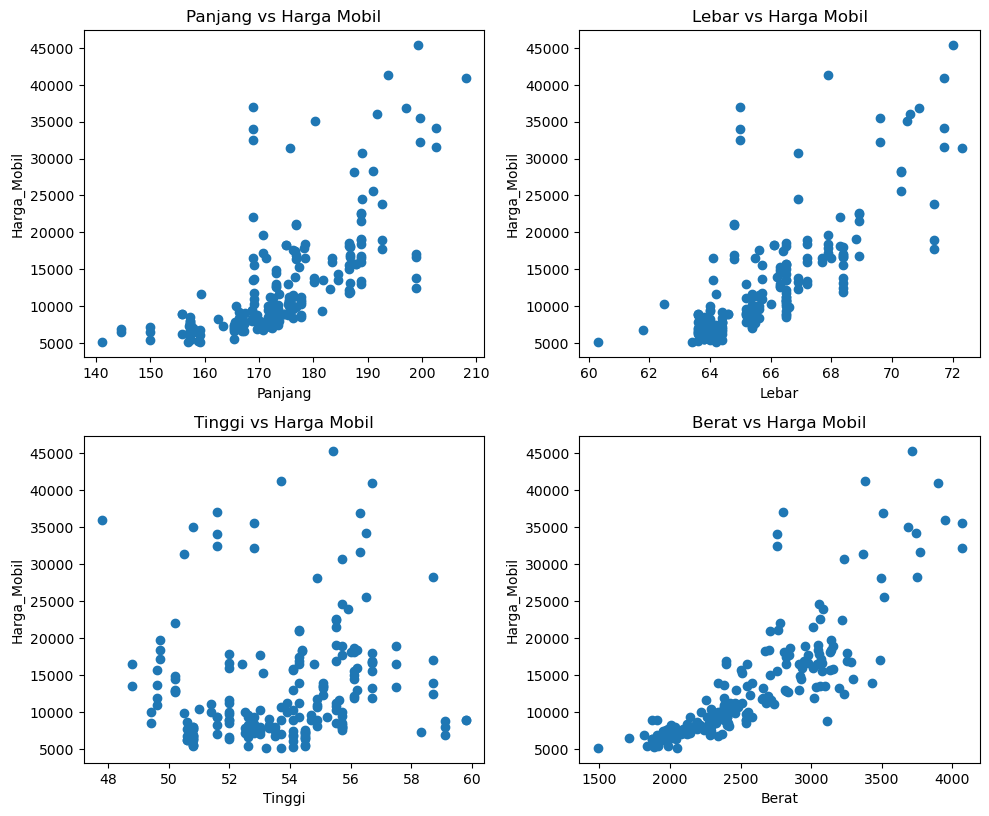

In [24]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Harga_Mobil'])
    plt.title(x+' vs Harga Mobil')
    plt.ylabel('Harga_Mobil')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Panjang', 1)
scatter('Lebar', 2)
scatter('Tinggi', 3)
scatter('Berat', 4)

plt.tight_layout()

Berat, panjang, dan lebar dari mobil terlihat memiliki korelasi yang positif dengan harga mobil. Sedangkan tinggi tidak menunjukkan tren yang signifikan dengan harga mobil.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


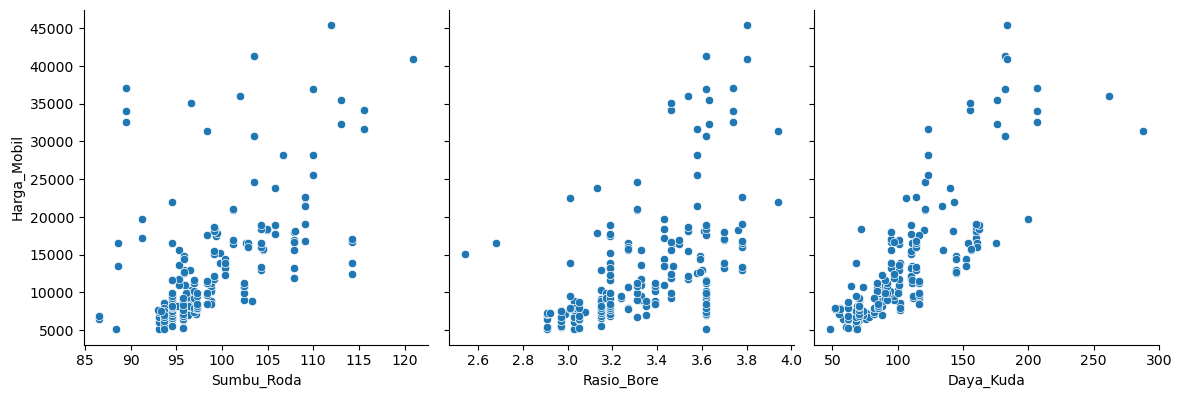

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


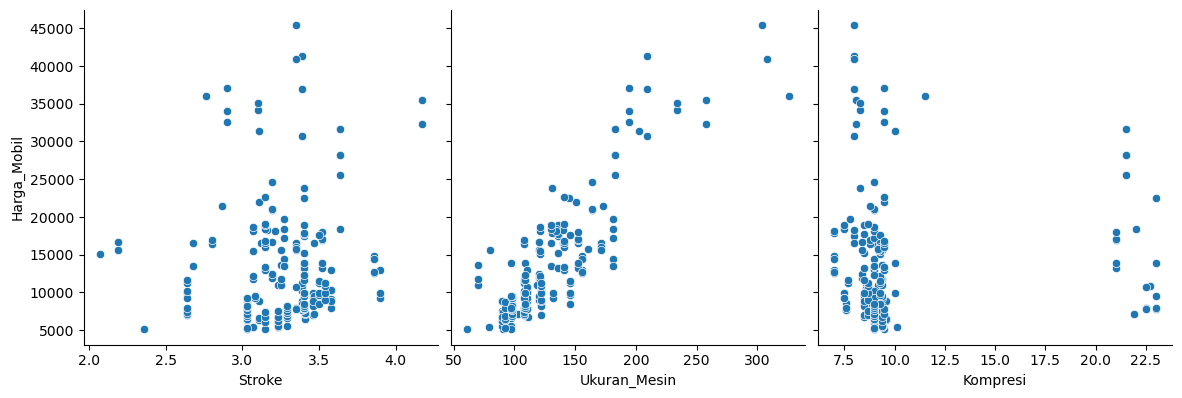

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


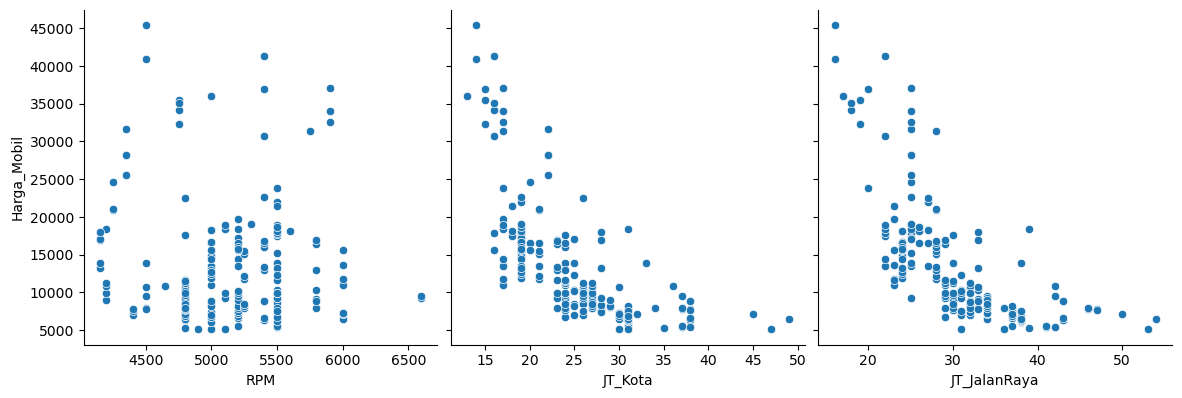

In [25]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='Harga_Mobil',size=4, aspect=1, kind='scatter')
    plt.show()

pp('Sumbu_Roda', 'Rasio_Bore', 'Daya_Kuda')
pp('Stroke', 'Ukuran_Mesin', 'Kompresi')
pp('RPM', 'JT_Kota', 'JT_JalanRaya')

Sumbu roda, Rasio Bore, Daya kuda, dan Ukuran mesin terlihat memiliki korelasi yang positif dengan harga mobil. Sedangkan JT_Kota dan JT_JalanRaya terlihat memiliki korelasi negatif dengan Harga Mobil.

In [26]:
#Mengelompokkan Perusahaan berdasarkan rata-rata harga dari tiap perusahaan
df['Harga_Mobil'] = df['Harga_Mobil'].astype('int')
temp = df.copy()
table = temp.groupby(['Nama_Perusahaan'])['Harga_Mobil'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Nama_Perusahaan')
group = [0,10000,20000,40000]
df_group=['Entrylevel','Midrange','Highend']
df['Range_Harga'] = pd.cut(temp['Harga_Mobil_y'],group,right=False,labels=df_group)
q=df[df['Range_Harga']=='Entrylevel']
q

,ID_Pelanggan,Level_Risiko,Nama_Perusahaan,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,...,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Range_Harga
18,19,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,2bbl,2.91,3.03,9.50,48,5100,47,53,5151,Entrylevel
19,20,1,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,2bbl,3.03,3.11,9.60,70,5400,38,43,6295,Entrylevel
20,21,0,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,2bbl,3.03,3.11,9.60,70,5400,38,43,6575,Entrylevel
21,22,1,dodge,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,2.97,3.23,9.41,68,5500,37,41,5572,Entrylevel
22,23,1,dodge,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,2.97,3.23,9.40,68,5500,31,38,6377,Entrylevel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,178,-1,toyota,gas,std,four,hatchback,fwd,front,102.4,...,mpfi,3.31,3.54,8.70,92,4200,27,32,11248,Entrylevel
178,179,3,toyota,gas,std,two,hatchback,rwd,front,102.9,...,mpfi,3.27,3.35,9.30,161,5200,20,24,16558,Entrylevel
179,180,3,toyota,gas,std,two,hatchback,rwd,front,102.9,...,mpfi,3.27,3.35,9.30,161,5200,19,24,15998,Entrylevel
180,181,-1,toyota,gas,std,four,sedan,rwd,front,104.5,...,mpfi,3.27,3.35,9.20,156,5200,20,24,15690,Entrylevel


In [27]:
s=df[df['Range_Harga']=='Midrange']
s

,ID_Pelanggan,Level_Risiko,Nama_Perusahaan,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,...,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Range_Harga
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Midrange
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Midrange
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Midrange
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Midrange
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Midrange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,Midrange
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,Midrange
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,Midrange
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,Midrange


In [28]:
s=df[df['Range_Harga']=='Highend']
s

,ID_Pelanggan,Level_Risiko,Nama_Perusahaan,BBM,Tipe_Mobil,Pintu_Mobil,Badan_Mobil,Roda_Penggerak,Lokasi_Mesin,Sumbu_Roda,...,Sistem_BBM,Rasio_Bore,Stroke,Kompresi,Daya_Kuda,RPM,JT_Kota,JT_JalanRaya,Harga_Mobil,Range_Harga
10,11,2,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430,Highend
11,12,0,bmw,gas,std,four,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16925,Highend
12,13,0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.0,121,4250,21,28,20970,Highend
13,14,0,bmw,gas,std,four,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.0,121,4250,21,28,21105,Highend
14,15,1,bmw,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.31,3.19,9.0,121,4250,20,25,24565,Highend
15,16,0,bmw,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760,Highend
16,17,0,bmw,gas,std,two,sedan,rwd,front,103.5,...,mpfi,3.62,3.39,8.0,182,5400,16,22,41315,Highend
17,18,0,bmw,gas,std,four,sedan,rwd,front,110.0,...,mpfi,3.62,3.39,8.0,182,5400,15,20,36880,Highend
47,48,0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15,19,32250,Highend
48,49,0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550,Highend


### Independent Variable

In [29]:
df_lr=df[['Harga_Mobil','Tipe_Mobil', 'Silinder', 'Range_Harga', 'Mesin', 'Lebar', 'Ukuran_Mesin', 'Rasio_Bore', 'BBM', 'Badan_Mobil', 'Roda_Penggerak', 'Panjang', 'Daya_Kuda', 'Sumbu_Roda']]
df_lr

,Harga_Mobil,Tipe_Mobil,Silinder,Range_Harga,Mesin,Lebar,Ukuran_Mesin,Rasio_Bore,BBM,Badan_Mobil,Roda_Penggerak,Panjang,Daya_Kuda,Sumbu_Roda
0,13495,std,four,Midrange,dohc,64.1,130,3.47,gas,convertible,rwd,168.8,111,88.6
1,16500,std,four,Midrange,dohc,64.1,130,3.47,gas,convertible,rwd,168.8,111,88.6
2,16500,std,six,Midrange,ohcv,65.5,152,2.68,gas,hatchback,rwd,171.2,154,94.5
3,13950,std,four,Midrange,ohc,66.2,109,3.19,gas,sedan,fwd,176.6,102,99.8
4,17450,std,five,Midrange,ohc,66.4,136,3.19,gas,sedan,4wd,176.6,115,99.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,std,four,Midrange,ohc,68.9,141,3.78,gas,sedan,rwd,188.8,114,109.1
201,19045,turbo,four,Midrange,ohc,68.8,141,3.78,gas,sedan,rwd,188.8,160,109.1
202,21485,std,six,Midrange,ohcv,68.9,173,3.58,gas,sedan,rwd,188.8,134,109.1
203,22470,turbo,six,Midrange,ohc,68.9,145,3.01,diesel,sedan,rwd,188.8,106,109.1


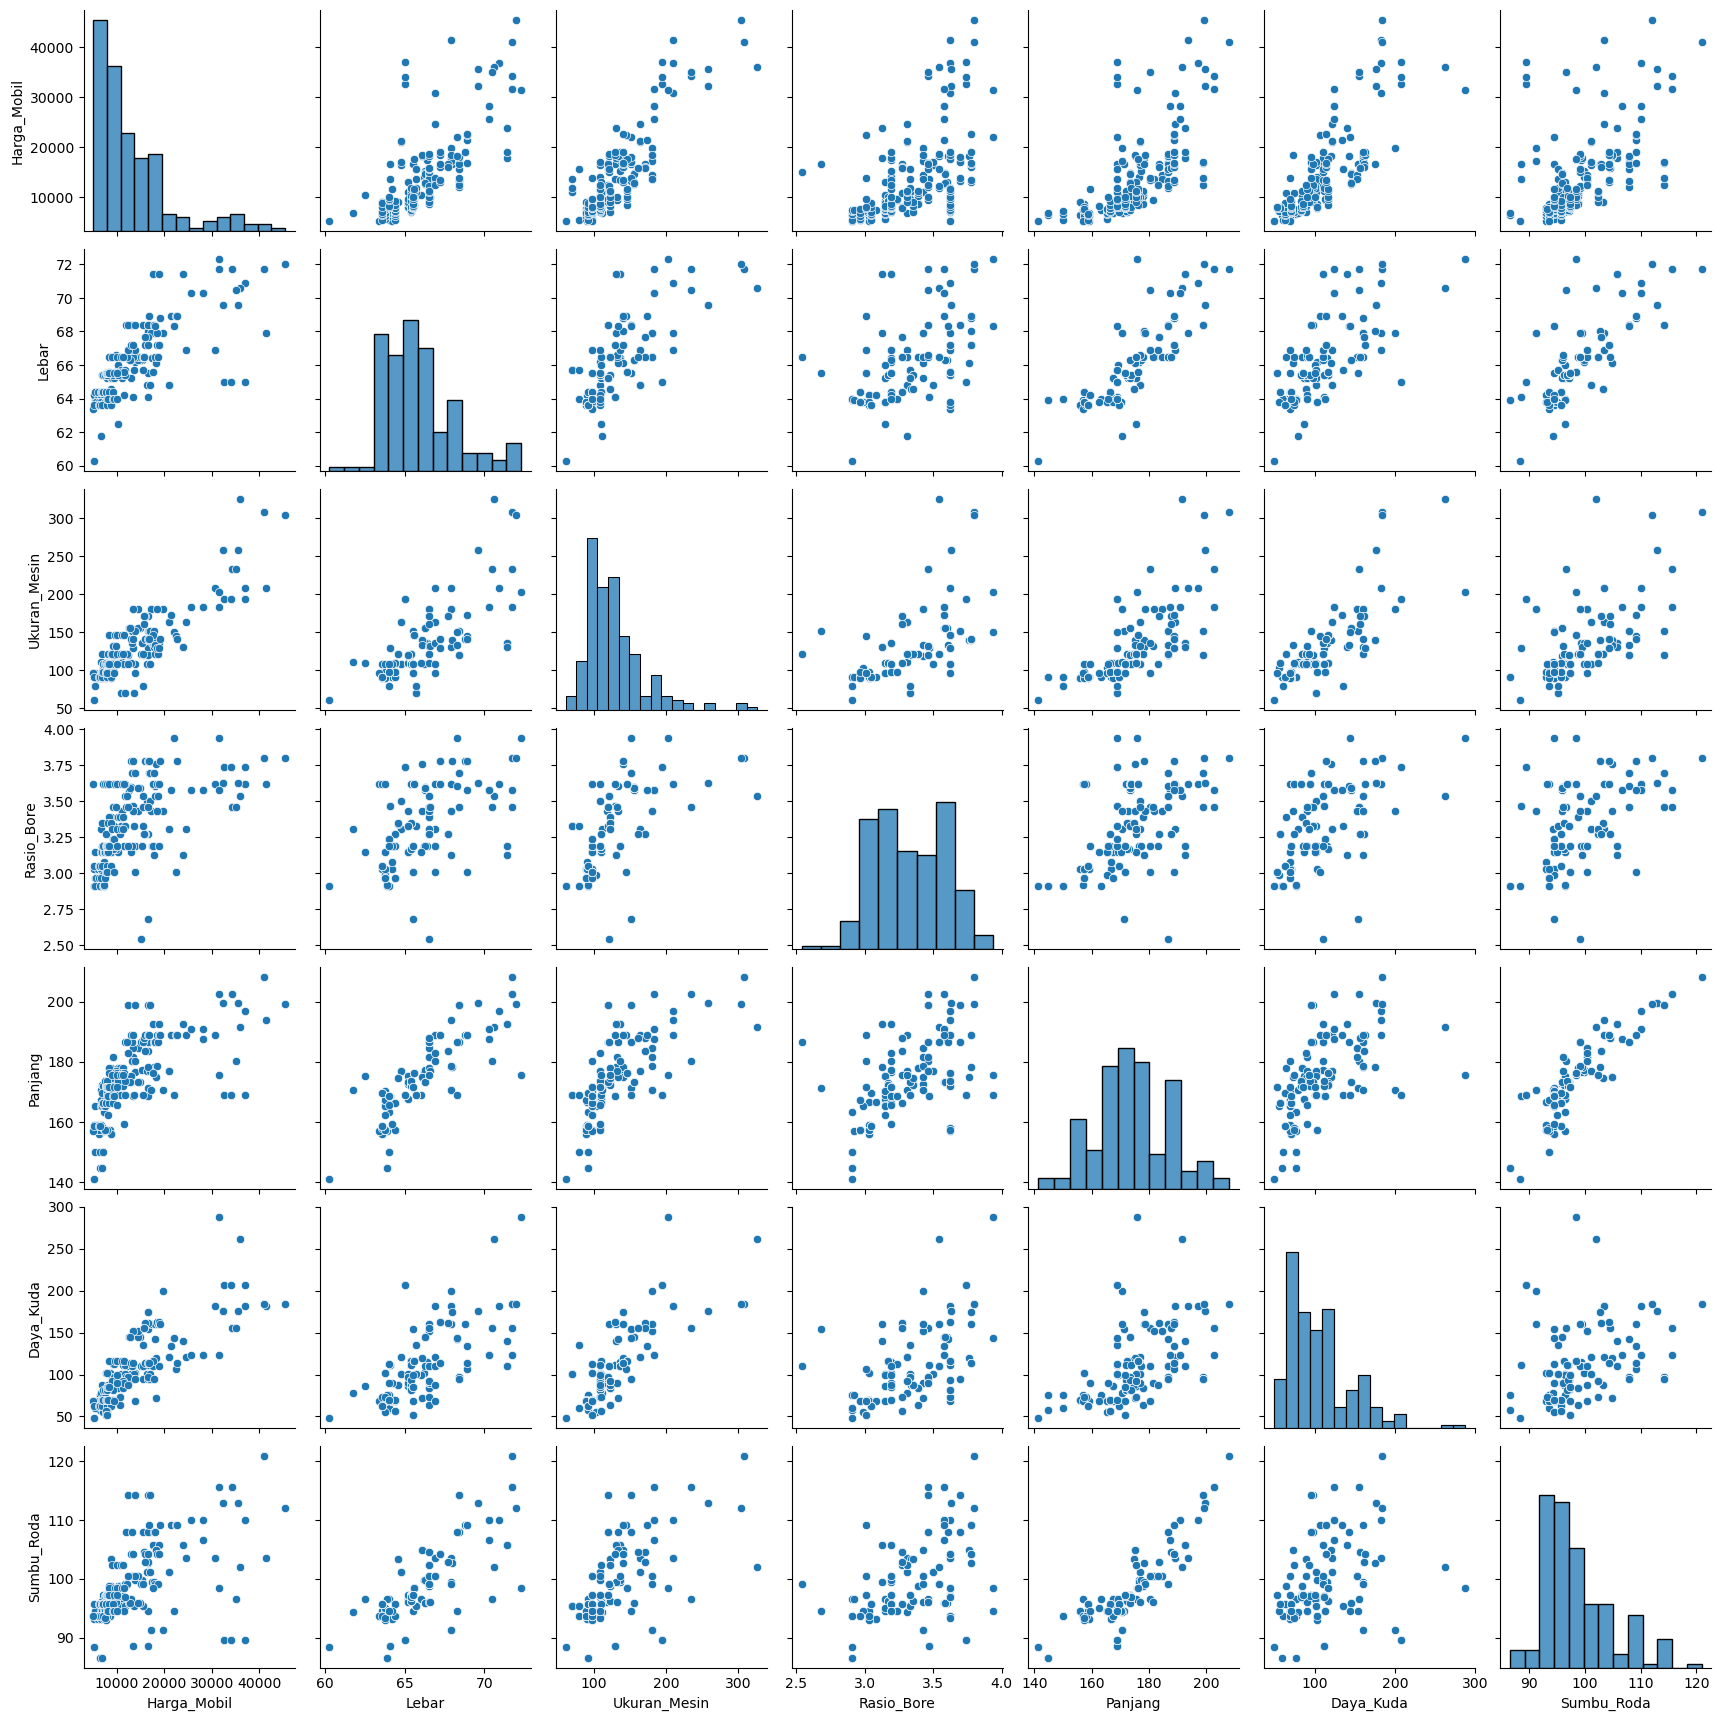

In [30]:
sns.pairplot(df_lr)
plt.show()

## Dummy Variable

In [31]:
def dummies(x,dfa):
    temp = pd.get_dummies(dfa[x], drop_first = True)
    dfa = pd.concat([dfa, temp], axis = 1)
    dfa.drop([x], axis = 1, inplace = True)
    return dfa

df_lr = dummies('BBM',df_lr)
df_lr = dummies('Tipe_Mobil',df_lr)
df_lr = dummies('Badan_Mobil',df_lr)
df_lr = dummies('Roda_Penggerak',df_lr)
df_lr = dummies('Mesin',df_lr)
df_lr = dummies('Silinder',df_lr)
df_lr = dummies('Range_Harga',df_lr)
df_lr

,Harga_Mobil,Lebar,Ukuran_Mesin,Rasio_Bore,Panjang,Daya_Kuda,Sumbu_Roda,gas,turbo,hardtop,...,ohcv,rotor,five,four,six,three,twelve,two,Midrange,Highend
0,13495,64.1,130,3.47,168.8,111,88.6,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,16500,64.1,130,3.47,168.8,111,88.6,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,16500,65.5,152,2.68,171.2,154,94.5,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,13950,66.2,109,3.19,176.6,102,99.8,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,17450,66.4,136,3.19,176.6,115,99.4,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,68.9,141,3.78,188.8,114,109.1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
201,19045,68.8,141,3.78,188.8,160,109.1,1,1,0,...,0,0,0,1,0,0,0,0,1,0
202,21485,68.9,173,3.58,188.8,134,109.1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
203,22470,68.9,145,3.01,188.8,106,109.1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


## Train/Test Split

In [32]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
var_angka = ['Sumbu_Roda', 'Ukuran_Mesin', 'Rasio_Bore', 'Daya_Kuda','Panjang','Lebar','Harga_Mobil']
df_train[var_angka] = scaler.fit_transform(df_train[var_angka])
df_train

,Harga_Mobil,Lebar,Ukuran_Mesin,Rasio_Bore,Panjang,Daya_Kuda,Sumbu_Roda,gas,turbo,hardtop,...,ohcv,rotor,five,four,six,three,twelve,two,Midrange,Highend
122,0.068818,0.291667,0.139623,0.230159,0.426016,0.083333,0.244828,1,0,0,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.666667,0.339623,1.000000,0.452033,0.395833,0.272414,1,0,0,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.308333,0.139623,0.444444,0.448780,0.266667,0.272414,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.316667,0.260377,0.626984,0.450407,0.262500,0.068966,1,0,0,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.575000,0.260377,0.746032,0.775610,0.475000,0.610345,1,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.114954,0.425000,0.184906,0.388889,0.508943,0.283333,0.334483,1,1,0,...,0,0,0,1,0,0,0,0,0,0
103,0.231539,0.516667,0.452830,0.595238,0.707317,0.433333,0.475862,1,0,0,...,1,0,0,0,1,0,0,0,1,0
67,0.564522,0.833333,0.460377,0.714286,0.809756,0.312500,0.806897,0,1,0,...,0,0,1,0,0,0,0,0,0,1
24,0.030693,0.291667,0.109434,0.230159,0.263415,0.083333,0.244828,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
df_train.describe()

,Harga_Mobil,Lebar,Ukuran_Mesin,Rasio_Bore,Panjang,Daya_Kuda,Sumbu_Roda,gas,turbo,hardtop,...,ohcv,rotor,five,four,six,three,twelve,two,Midrange,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.461655,0.241351,0.497946,0.525476,0.227302,0.411141,0.909091,0.181818,0.020979,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.184517,0.154619,0.207140,0.204848,0.165511,0.205581,0.288490,0.387050,0.143818,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.304167,0.135849,0.305556,0.399187,0.091667,0.272414,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.425000,0.184906,0.500000,0.502439,0.191667,0.341379,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.550000,0.301887,0.682540,0.669919,0.283333,0.503448,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


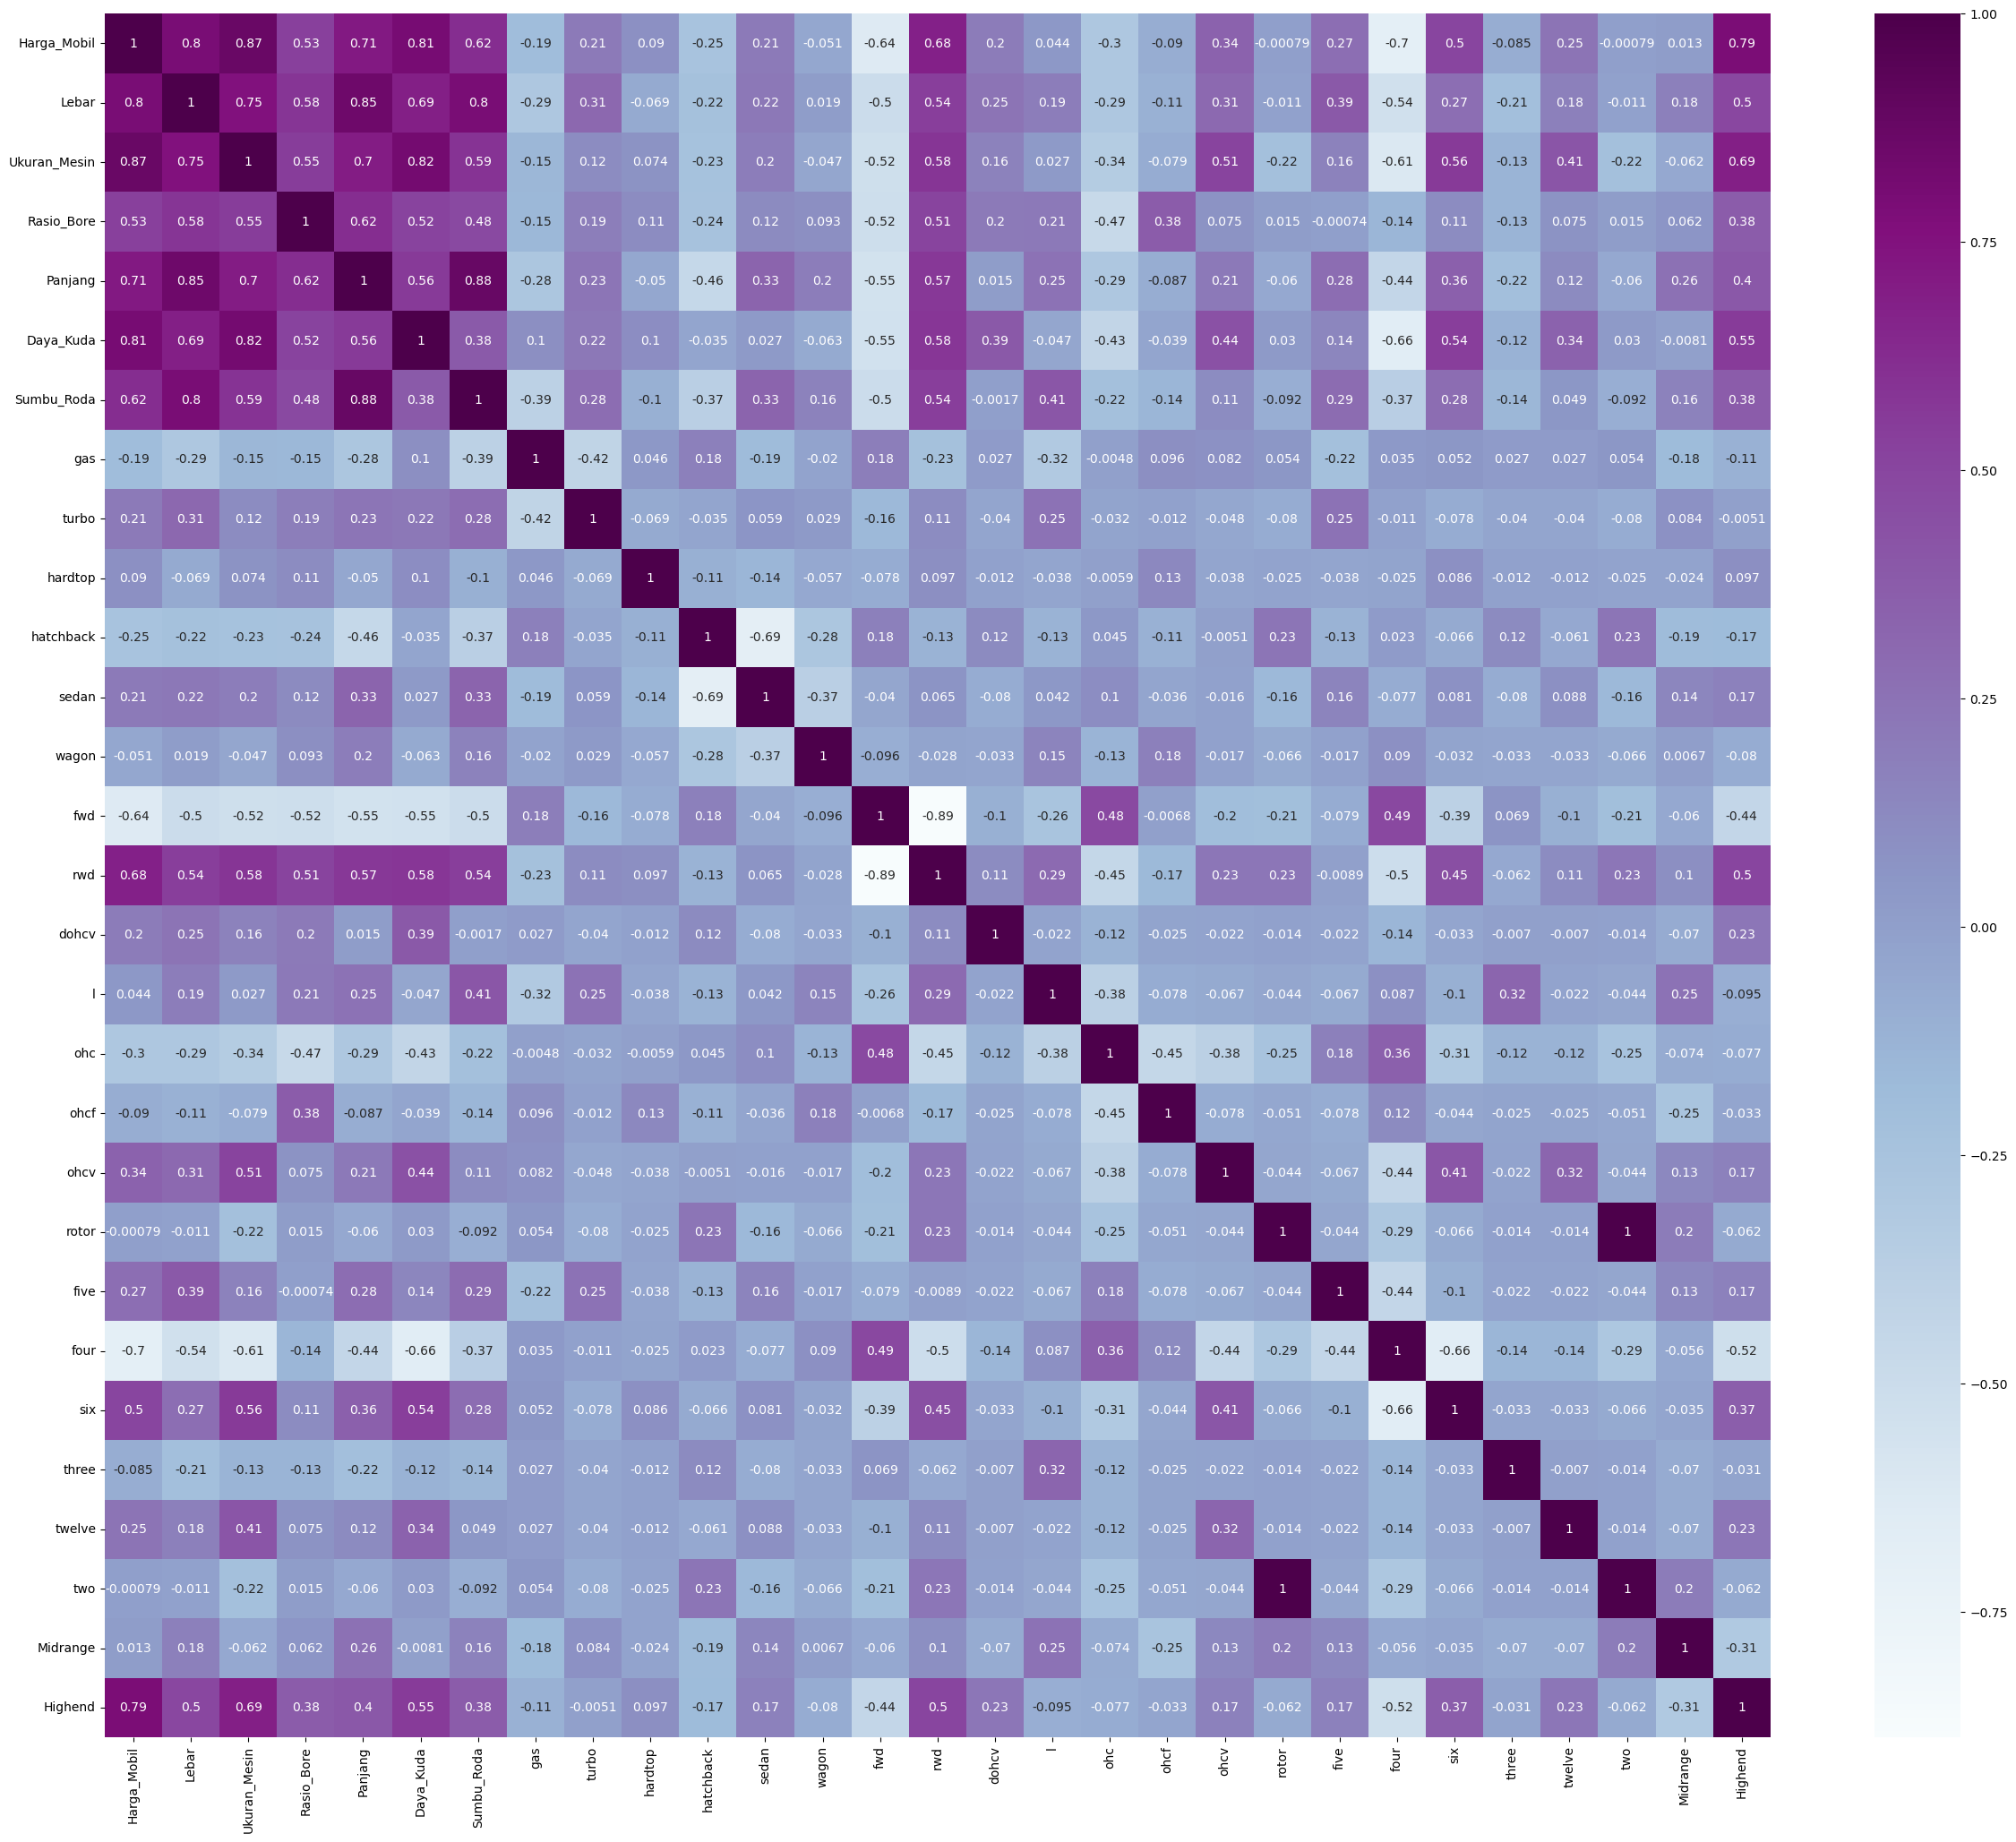

In [35]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="BuPu")
plt.show()

Variabel yang memiliki korelasi yang tinggi dengan Harga Mobil adalah ukuran mesin, daya kuda, lebar, dan highend.

In [36]:
y_train = df_train.pop('Harga_Mobil')
X_train = df_train

## Model Building

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lebar', True, 1),
 ('Ukuran_Mesin', False, 10),
 ('Rasio_Bore', False, 9),
 ('Panjang', False, 15),
 ('Daya_Kuda', True, 1),
 ('Sumbu_Roda', True, 1),
 ('gas', False, 3),
 ('turbo', False, 17),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 11),
 ('rwd', False, 18),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 12),
 ('rotor', False, 16),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 6),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 14),
 ('Midrange', False, 13),
 ('Highend', True, 1)]

In [40]:
X_train.columns[rfe.support_]

Index(['Lebar', 'Daya_Kuda', 'Sumbu_Roda', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'three', 'twelve', 'Highend'],
      dtype='object')

In [41]:
rfe_X_train = X_train[X_train.columns[rfe.support_]]
rfe_X_train.head()

,Lebar,Daya_Kuda,Sumbu_Roda,hatchback,sedan,wagon,dohcv,three,twelve,Highend
122,0.291667,0.083333,0.244828,0,1,0,0,0,0,0
125,0.666667,0.395833,0.272414,1,0,0,0,0,0,1
166,0.308333,0.266667,0.272414,1,0,0,0,0,0,0
1,0.316667,0.262500,0.068966,0,0,0,0,0,0,0
199,0.575000,0.475000,0.610345,0,0,1,0,0,0,0


In [42]:
def build_model(X,y):
    X = sm.add_constant(X) #menambahkan constant
    lm = sm.OLS(y,X).fit() # fitting model
    print(lm.summary()) # rangkuman fitting
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [43]:
a_X_train = build_model(rfe_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     164.5
Date:                Tue, 02 May 2023   Prob (F-statistic):           2.01e-69
Time:                        15:43:56   Log-Likelihood:                 202.86
No. Observations:                 143   AIC:                            -383.7
Df Residuals:                     132   BIC:                            -351.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0277      0.028     -0.994      0.3

Drop twelve karena memiliki p-value yang lebih besar dari 0.05.

#### Model 2

In [44]:
b_X_train = a_X_train.drop(["twelve"], axis = 1)

In [45]:
b_X_train = build_model(b_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     181.1
Date:                Tue, 02 May 2023   Prob (F-statistic):           4.12e-70
Time:                        15:43:56   Log-Likelihood:                 201.72
No. Observations:                 143   AIC:                            -383.4
Df Residuals:                     133   BIC:                            -353.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0209      0.028     -0.760      0.4

In [46]:
checkVIF(b_X_train)

,Features,VIF
0,const,28.93
5,sedan,6.74
4,hatchback,5.76
1,Lebar,5.59
3,Sumbu_Roda,4.24
6,wagon,3.98
2,Daya_Kuda,2.64
9,Highend,1.59
7,dohcv,1.30
8,three,1.07


#### Model 3

In [47]:
c_X_train = b_X_train.drop(["sedan"], axis = 1)
c_X_train = build_model(c_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.90e-68
Time:                        15:43:56   Log-Likelihood:                 194.73
No. Observations:                 143   AIC:                            -371.5
Df Residuals:                     134   BIC:                            -344.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1006      0.018     -5.604      0.0

In [48]:
checkVIF(c_X_train)

,Features,VIF
0,const,11.22
1,Lebar,5.54
3,Sumbu_Roda,3.82
2,Daya_Kuda,2.60
8,Highend,1.58
4,hatchback,1.29
6,dohcv,1.28
5,wagon,1.15
7,three,1.07


#### Model 4

In [49]:
d_X_train = c_X_train.drop(["Lebar"], axis = 1)
d_X_train = build_model(d_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     176.4
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.09e-64
Time:                        15:43:56   Log-Likelihood:                 182.64
No. Observations:                 143   AIC:                            -349.3
Df Residuals:                     135   BIC:                            -325.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0576      0.017     -3.379      0.0

#### Model 5

In [50]:
e_X_train = d_X_train.drop(["three"], axis = 1)
e_X_train = build_model(e_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.27e-65
Time:                        15:43:56   Log-Likelihood:                 182.04
No. Observations:                 143   AIC:                            -350.1
Df Residuals:                     136   BIC:                            -329.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0554      0.017     -3.273      0.0

#### Model 6

In [51]:
f_X_train = e_X_train.drop(["wagon"], axis = 1)
f_X_train = build_model(f_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     242.5
Date:                Tue, 02 May 2023   Prob (F-statistic):           3.32e-66
Time:                        15:43:56   Log-Likelihood:                 180.51
No. Observations:                 143   AIC:                            -349.0
Df Residuals:                     137   BIC:                            -331.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0599      0.017     -3.557      0.0

#### Model 7

In [52]:
g_X_train = f_X_train.drop(["hatchback"], axis = 1)
g_X_train = build_model(g_X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     296.1
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.19e-66
Time:                        15:43:56   Log-Likelihood:                 178.53
No. Observations:                 143   AIC:                            -347.1
Df Residuals:                     138   BIC:                            -332.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0765      0.015     -5.195      0.0

In [53]:
checkVIF(g_X_train)

,Features,VIF
0,const,6.20
1,Daya_Kuda,1.75
4,Highend,1.52
2,Sumbu_Roda,1.27
3,dohcv,1.23


## Residual Analysis

In [54]:
lm = sm.OLS(y_train,g_X_train).fit()
y_train_harga = lm.predict(g_X_train)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

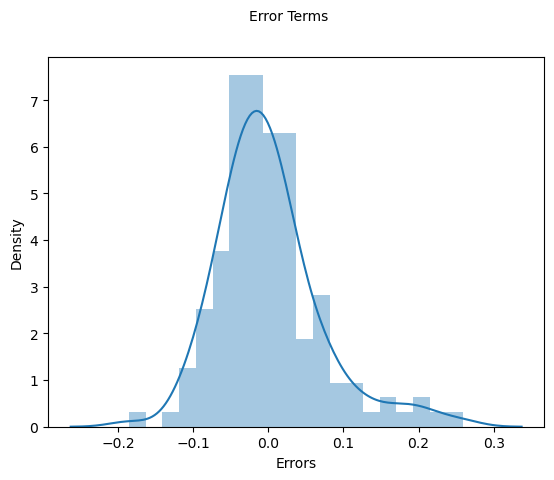

In [55]:
fig = plt.figure()
sns.distplot((y_train - y_train_harga), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)           
plt.xlabel('Errors', fontsize = 10)   

Dari grafik terlihat bahwa error terms terdistribusi secara normal yang dapat diasumsikan bahwa linear modeling terpenuhi.

## Prediction and Evaluation

In [56]:
var_angka = ['Sumbu_Roda', 'Ukuran_Mesin', 'Rasio_Bore', 'Daya_Kuda','Panjang','Lebar','Harga_Mobil']
df_test[var_angka] = scaler.fit_transform(df_test[var_angka])
y_test = df_test.pop('Harga_Mobil')
X_test = df_test

In [57]:
g_X_train = g_X_train.drop('const',axis=1)
a_X_test = X_test[g_X_train.columns]
a_X_test= sm.add_constant(a_X_test)

In [58]:
y_pred = lm.predict(a_X_test)

In [59]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6565343893399094

Text(0, 0.5, 'y_pred')

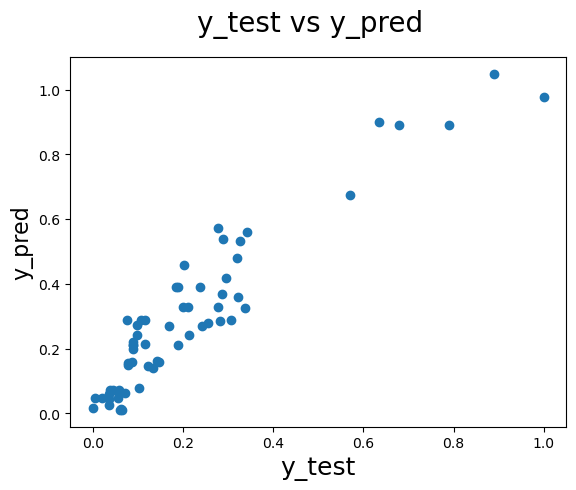

In [60]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Harga_Mobil   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     296.1
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.19e-66
Time:                        15:43:56   Log-Likelihood:                 178.53
No. Observations:                 143   AIC:                            -347.1
Df Residuals:                     138   BIC:                            -332.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0765      0.015     -5.195      0.0

1.R-squared (0.896) and adj R-squared (0.893) menunjukkan bahwa hampir 90% varians dijelaskan.<br> 2. P-values dari semua koefisien sangat rendah di bawah 0.05 yang menunjukkan bahwa semua prediktor signifikan secara statistik. <br> 3. F-stat (296.1) dan Prob F-stat (1.19e-66 ~ menuju 0) menunjukkan bahwa model signifikan dan 90% varians yang dapat dijelaskan bukanlah kebetulan.